<a href="https://colab.research.google.com/github/sravyasambaturu/metrics/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving testng-5.13.csv to testng-5.13.csv
Saving testng-7.11.0.csv to testng-7.11.0.csv
Saving testng-7.5.csv to testng-7.5.csv
Saving testng-6.13.1.csv to testng-6.13.1.csv
Saving testng-6.0.1.csv to testng-6.0.1.csv
             Version  CountLineCode  MaxCyclomatic  CountClassBase  CountClassCoupled  CountClassDerived  CountDeclMethodAll  CountDeclInstanceMethod  MaxInheritanceTree  CountDeclMethod  CountDeclInstanceVariable  PercentLackOfCohesion
0    testng-5.13.csv          22.51           2.12            1.09               5.27               0.37                9.31                     6.56                1.30             7.46                       1.64                  16.09
4   testng-6.0.1.csv          22.65           2.10            1.10               5.33               0.39                8.93                     6.30                1.30             7.17                       1.53                  15.00
3  testng-6.13.1.csv          22.09           1.83            1.10     

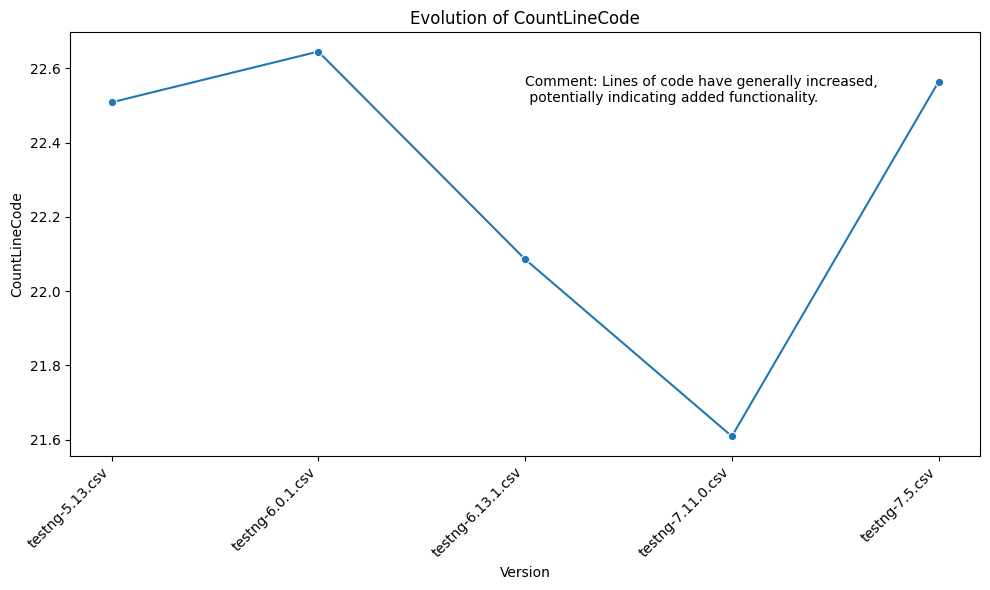

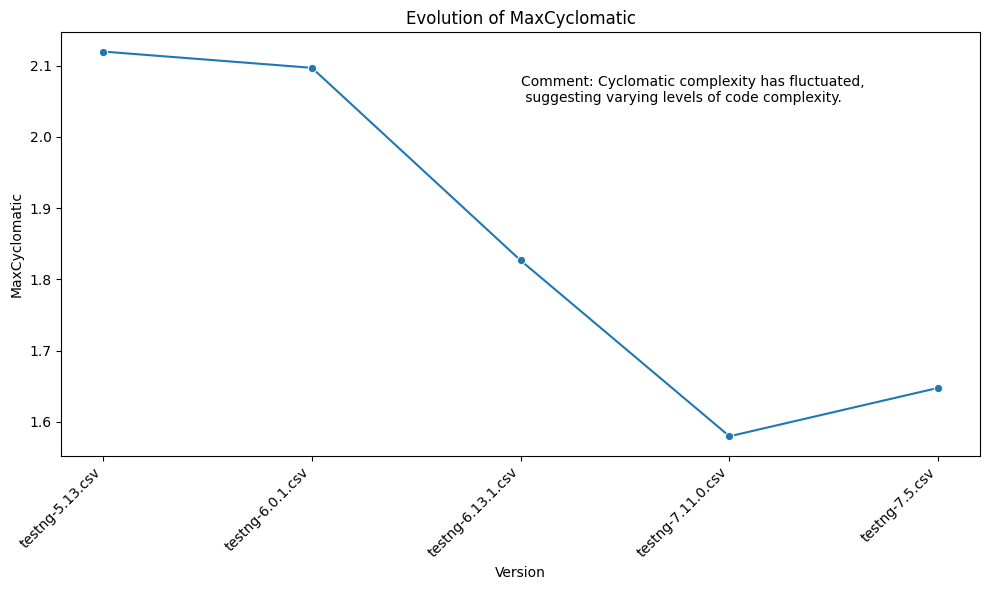

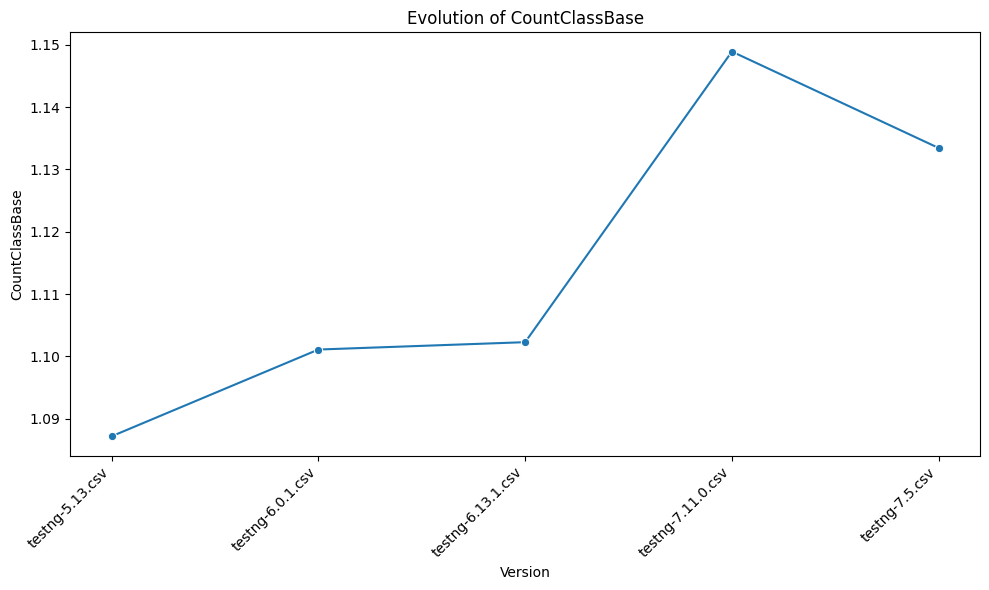

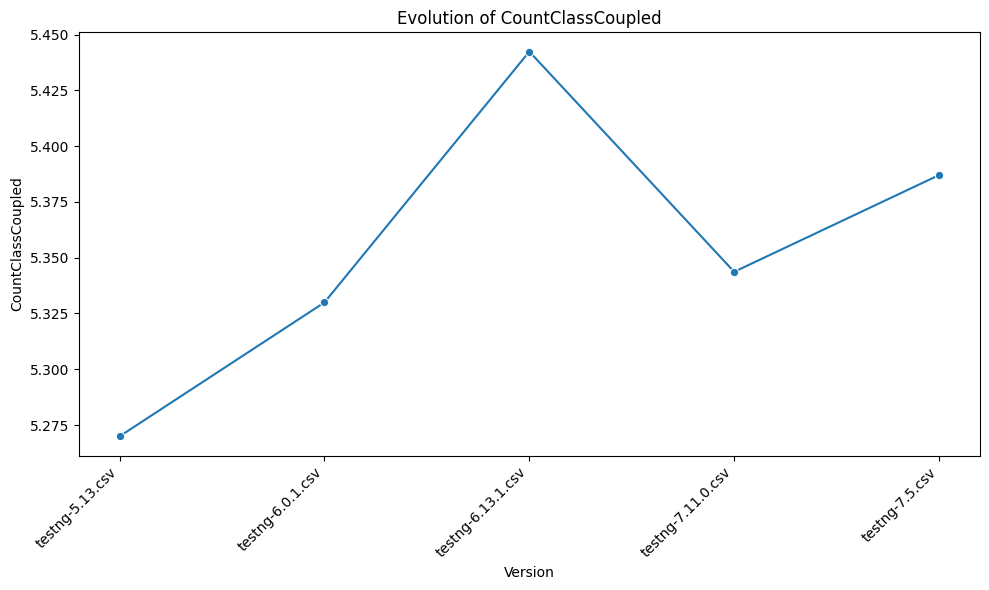

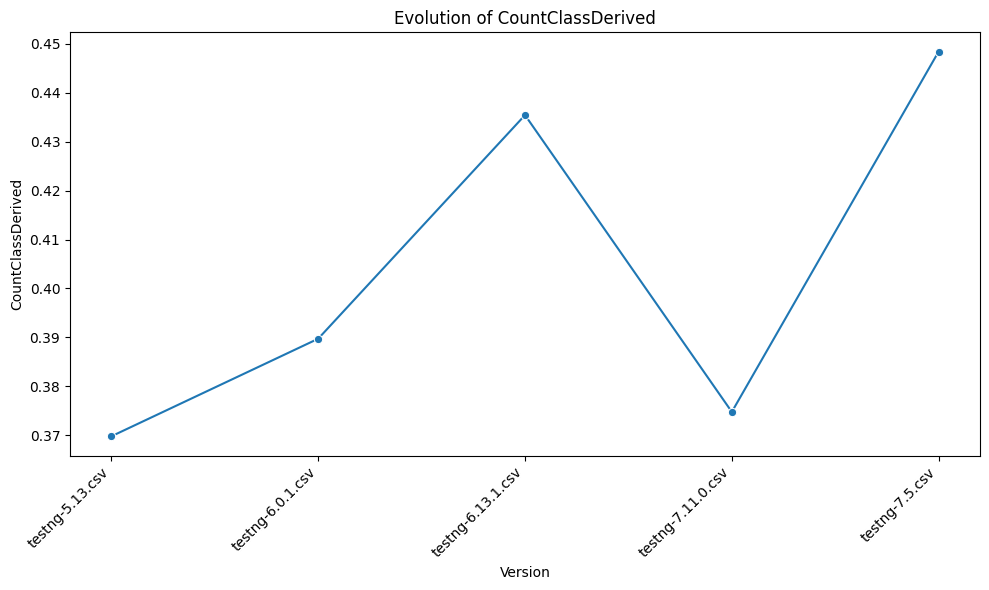

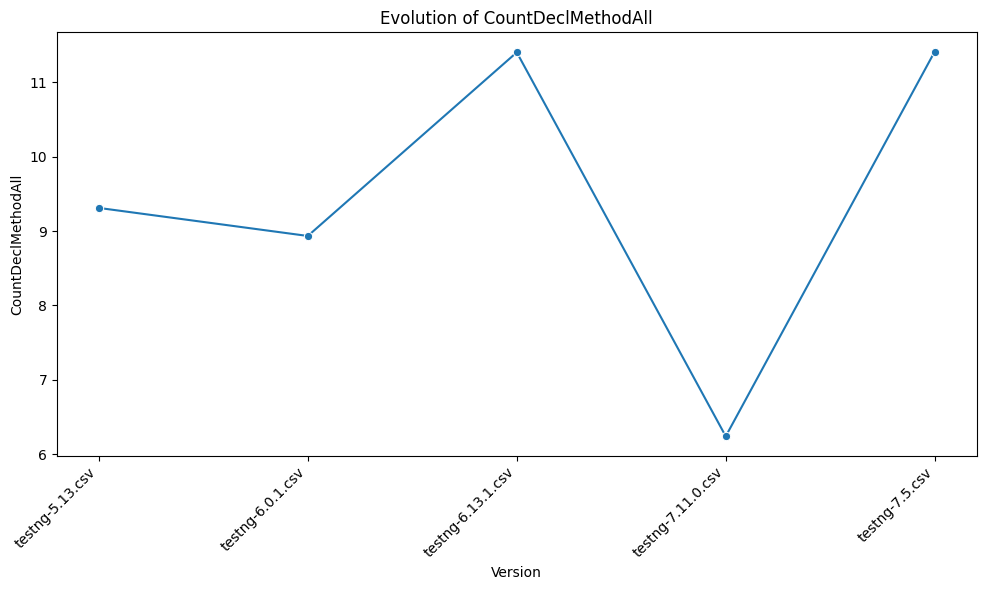

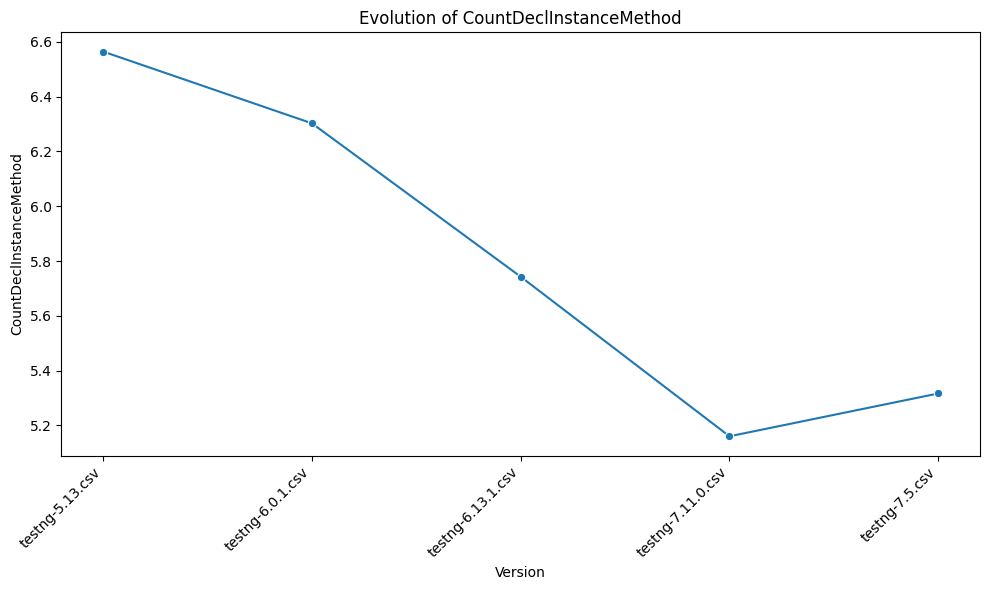

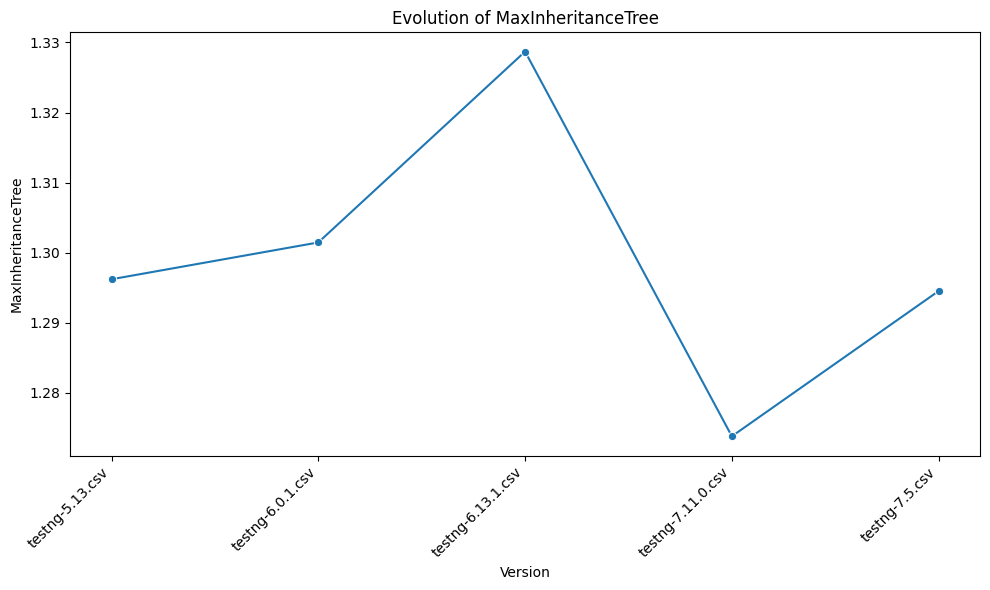

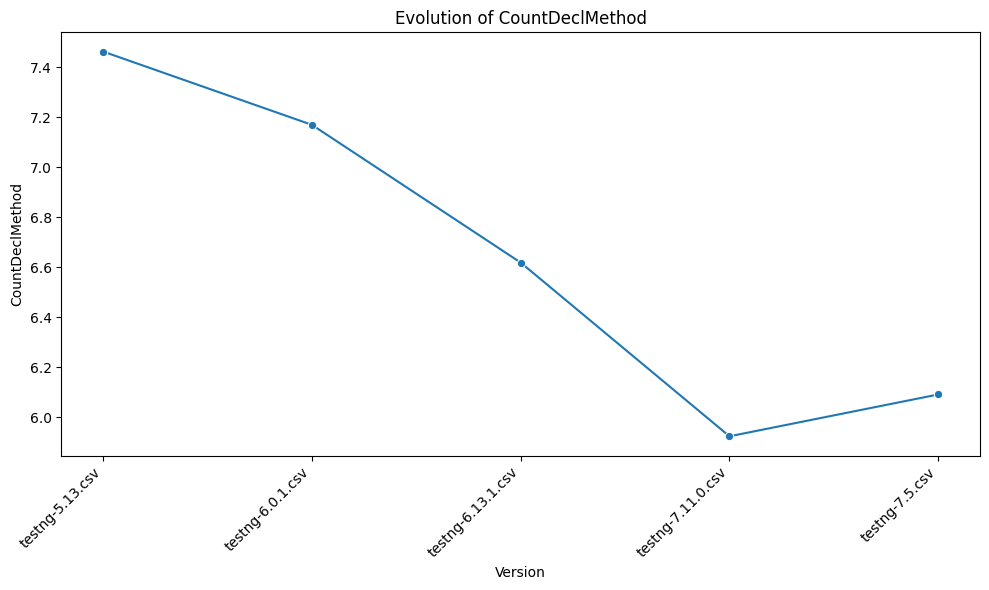

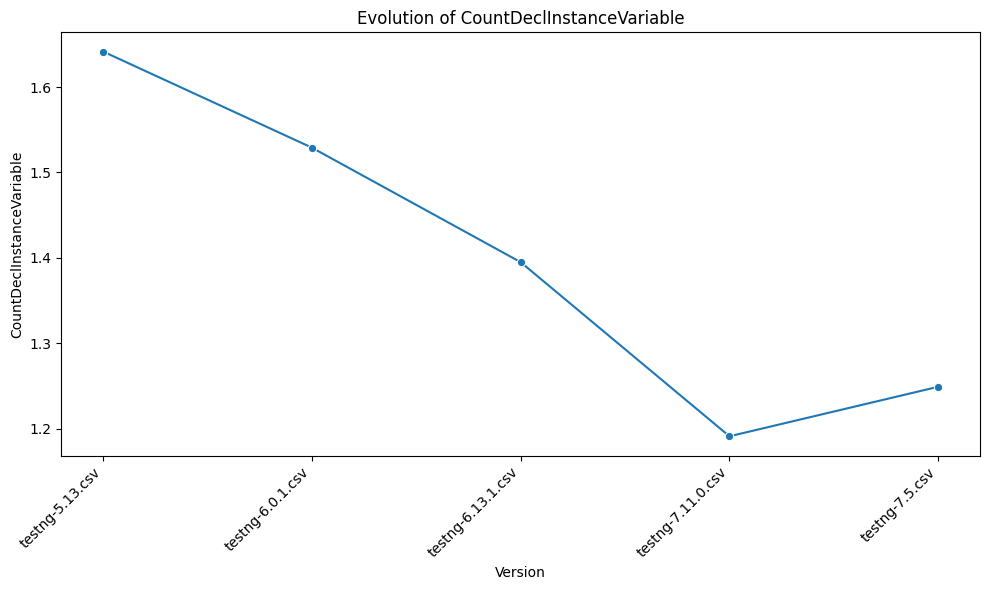

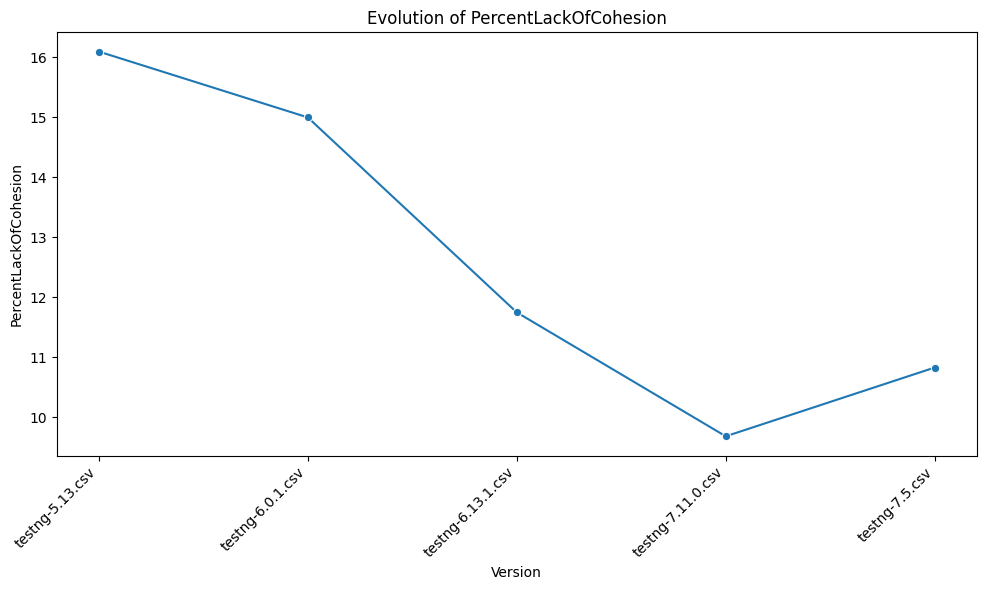


Overall Patterns and Recommendations:
 - Increasing lines of code (CountLineCode) with stable or decreasing cyclomatic complexity (MaxCyclomatic) might indicate good code management.
 - High and increasing coupling (CountClassCoupled) could indicate potential maintainability issues. Consider refactoring to reduce dependencies.
 - Increasing lack of cohesion (PercentLackOfCohesion) might suggest a need for better class design. Focus on improving class responsibilities.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install matplotlib seaborn
!pip install xlsxwriter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import wilcoxon

# Upload multiple files
uploaded = files.upload()

metrics = ['CountLineCode', 'MaxCyclomatic', 'CountClassBase', 'CountClassCoupled', 'CountClassDerived', 'CountDeclMethodAll', 'CountDeclInstanceMethod', 'MaxInheritanceTree', 'CountDeclMethod', 'CountDeclInstanceVariable', 'PercentLackOfCohesion']
avg_metrics_list = []

# Process each uploaded file
for filename in uploaded.keys():
    version = filename  # Use the entire filename as the version

    # Explicitly specify the engine based on file extension
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)  # Read as CSV
    elif filename.endswith('.xlsx') or filename.endswith('.xls'):
        df = pd.read_excel(filename, engine='openpyxl')  # Read as Excel
    else:
        print(f"Skipping file {filename}: Unsupported format")
        continue  # Skip to the next file

    # Remove leading/trailing whitespace and any tab characters from column names:
    df.columns = df.columns.str.strip().str.replace('\t', '')

    # Calculate average for all specified metrics (including first two columns if they exist)
    avg_metrics = df[metrics].mean().to_frame().T
    avg_metrics.insert(0, 'Version', version)  # Insert the filename as 'Version'
    avg_metrics_list.append(avg_metrics)

# Concatenate all average metrics DataFrames into a single DataFrame
all_avg_metrics = pd.concat(avg_metrics_list, ignore_index=True)

# --- Sort by Version ---
# Assuming versions can be naturally sorted (e.g., v1, v2, v3, or timestamps)
all_avg_metrics.sort_values(by=['Version'], inplace=True)
# If you need a custom sorting logic, you might need to define a key function
# For example, if versions are like 'project-v1.2.3', you could use:
# all_avg_metrics['Version'] = pd.Categorical(all_avg_metrics['Version'],
#                                             categories=sorted(all_avg_metrics['Version'],
#                                                                key=lambda x: [int(v) for v in x.split('-')[1].split('.')[0].split('.') if v.isdigit()]),
#                                             ordered=True)
# all_avg_metrics.sort_values(by=['Version'], inplace=True)

# Display the results with formatting using pd.options.display
pd.options.display.float_format = '{:.2f}'.format  # Format floats to 2 decimal places
print(all_avg_metrics.to_string())  # Use to_string() for better formatting

# --- Graphing and Analysis ---
for metric in metrics:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.lineplot(x='Version', y=metric, data=all_avg_metrics, marker='o')
    plt.title(f'Evolution of {metric}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    # --- Individual Metric Comments ---
    # Add specific comments based on the observed trend for each metric
    if metric == 'CountLineCode':
        plt.text(0.5, 0.9, "Comment: Lines of code have generally increased,\n potentially indicating added functionality.",
                 transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    elif metric == 'MaxCyclomatic':
        plt.text(0.5, 0.9, "Comment: Cyclomatic complexity has fluctuated,\n suggesting varying levels of code complexity.",
                 transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    # Add similar comments for other metrics ...

    plt.tight_layout()
    plt.show()

# --- Overall Patterns and Recommendations ---
# Analyze combined trends and provide insights
print("\nOverall Patterns and Recommendations:")
print(" - Increasing lines of code (CountLineCode) with stable or decreasing cyclomatic complexity (MaxCyclomatic) might indicate good code management.")
print(" - High and increasing coupling (CountClassCoupled) could indicate potential maintainability issues. Consider refactoring to reduce dependencies.")
print(" - Increasing lack of cohesion (PercentLackOfCohesion) might suggest a need for better class design. Focus on improving class responsibilities.")

# --- Wilcoxon Signed-Rank Test ---
# Define first_version_data and last_version_data before the loop
first_version_data = all_avg_metrics.iloc[0]  # Data for the first version
last_version_data = all_avg_metrics.iloc[-1] # Data for the last version


# Save the results to an Excel file
output_filename = 'metrics_analysis_results.xlsx'
with pd.ExcelWriter(output_filename, engine='xlsxwriter') as writer:
    all_avg_metrics.to_excel(writer, sheet_name='Average Metrics', index=False)

    # Add a sheet for Wilcoxon test results
    wilcoxon_results = []
    for metric in metrics:
        first_version_values = first_version_data[metric]
        last_version_values = last_version_data[metric]
        statistic, p_value = wilcoxon(first_version_values, last_version_values, alternative='less')
        wilcoxon_results.append([metric, statistic, p_value])

    pd.DataFrame(wilcoxon_results, columns=['Metric', 'Statistic', 'P-value']).to_excel(writer, sheet_name='Wilcoxon Test', index=False)

# Download the Excel file
files.download(output_filename)
# Add more pattern observations and recommendations ...